In [2]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
#make data frame of file 
try:
    df = pd.read_csv('diabetes.csv')
    print('file loaded successfull')
except FileNotFoundError:
    print('File not found ')
    

file loaded successfull


In [4]:
#checking about dataset
print('Size of data is --->',df.shape)
print()
print('Info of data set --->')
print(df.info())
print()
df.head(5)


Size of data is ---> (768, 9)

Info of data set --->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# we can see all data types are correct but it have values like 0 whick is not valid in medical 
''' 
so 
1)first we make a group of those who have 0
2) then we replace in nan vlues
3) in last fill nan values with their mean
'''
col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
df[col] = df[col].replace(0,np.nan)
df[col] = df[col].fillna(df[col].mean())
df.duplicated().sum() #no duplicated values so dont need to drop columns 



0

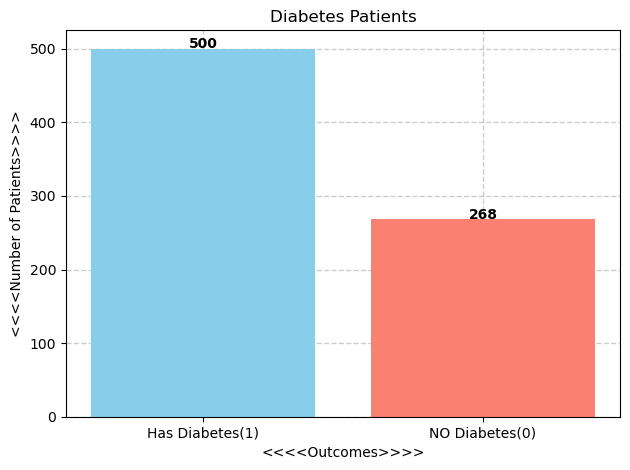

In [22]:
diabetes = df['Outcome'].value_counts()

plt.grid(color='gray',linestyle='--',linewidth=1,alpha =0.4)
plt.gca().set_axisbelow(True)
plt.bar(diabetes.index,diabetes.values,color = ['skyblue','salmon'])
plt.xlabel('<<<<Outcomes>>>>')
plt.ylabel('<<<<Number of Patients>>>>')
plt.title('Diabetes Patients')
plt.xticks([0,1],['Has Diabetes(1)','NO Diabetes(0)'])
plt.tight_layout()
for i, value in enumerate (diabetes.values):
    plt.text(i,value+1,str(value),ha='center',fontweight  = 'bold')
plt.show()

How do glucose levels differ between patients with and without diabetes?

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


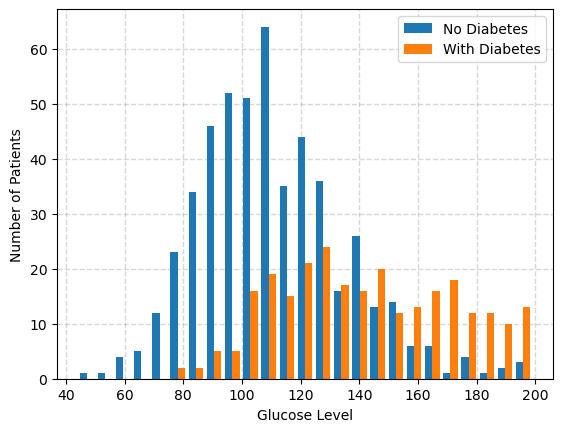

In [32]:
diabetes1 = df[df['Outcome']== 1]['Glucose']
Non_diabetes = df[df['Outcome']== 0]['Glucose']
plt.hist([Non_diabetes,diabetes1], bins= 25,label=['No Diabetes','With Diabetes'])
plt.grid(color='gray',linestyle='--',linewidth=1,alpha=0.3)
plt.xlabel('Glucose Level')
plt.ylabel('Number of Patients')
plt.gca().set_axisbelow(True)
plt.legend()
plt.show()

What is the trend of BMI across different age groups?


In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,40-50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,30-40
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,30-40
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,20-30
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,30-40


C:\Users\alokb\AppData\Local\Temp\ipykernel_10896\1322082170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_by_age = df.groupby('AgeGroup')['BMI'].mean()
posx and posy should be finite values
posx and posy should be finite values


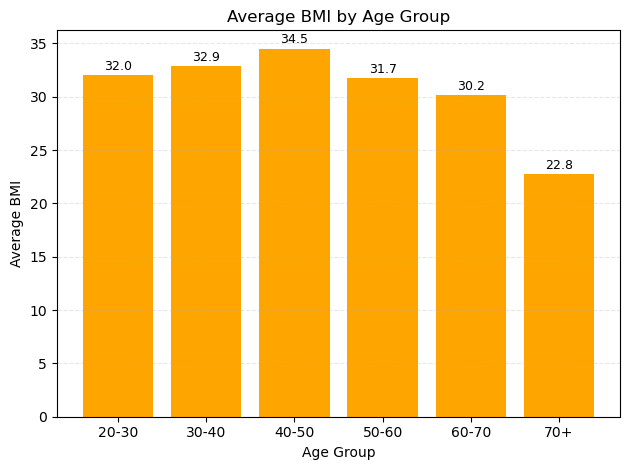

In [43]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100],labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
bmi_by_age = df.groupby('AgeGroup')['BMI'].mean()
bars = plt.bar(bmi_by_age.index.astype(str), bmi_by_age.values, color='orange')
for i, value in enumerate(bmi_by_age.values):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', fontsize=9)
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

How does blood pressure vary with age?

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,40-50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,30-40
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,30-40
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,20-30
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,30-40


C:\Users\alokb\AppData\Local\Temp\ipykernel_10896\3224230529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blood_by_age = df.groupby('AgeGroup')['BloodPressure'].mean().round(2)
posx and posy should be finite values
posx and posy should be finite values


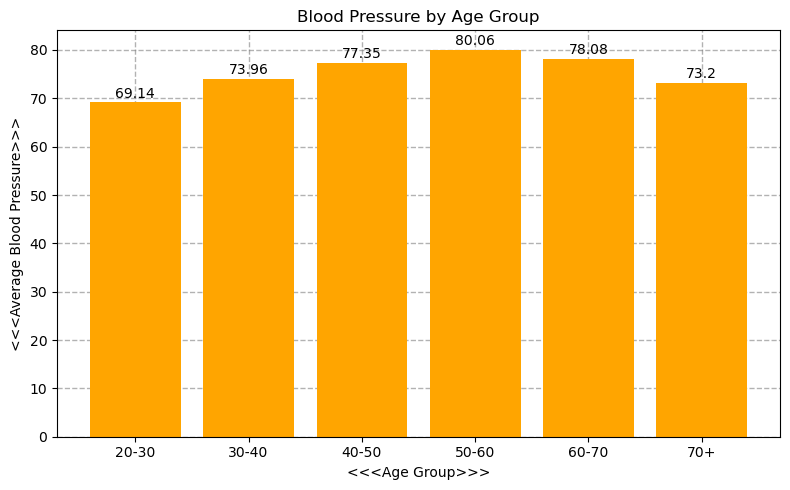

In [62]:
blood_by_age = df.groupby('AgeGroup')['BloodPressure'].mean().round(2)

plt.figure(figsize=(8, 5))
plt.bar(blood_by_age.index.astype(str), blood_by_age.values, color='orange')
plt.grid(color='gray', linewidth=1, alpha=0.6, linestyle='--')
plt.gca().set_axisbelow(True)
plt.xlabel('<<<Age Group>>>')
plt.ylabel('<<<Average Blood Pressure>>>')
plt.title('Blood Pressure by Age Group')
for i,value in enumerate( blood_by_age.values):
    plt.text(i,value+1,str(value),ha='center')
plt.tight_layout()
plt.show()


What is the average number of pregnancies in diabetic vs. non-diabetic patients?


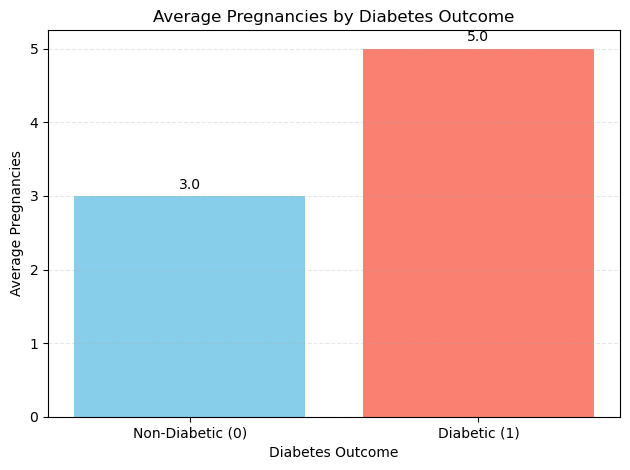

In [64]:
preg_avg = df.groupby('Outcome')['Pregnancies'].mean().round()
plt.bar(preg_avg.index, preg_avg.values, color=['skyblue', 'salmon'])
for i, value in enumerate(preg_avg.values):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', fontsize=10)

plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Pregnancies')
plt.title('Average Pregnancies by Diabetes Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [69]:
#saving the clean file
df['Insulin'] = df['Insulin'].astype(int)
df['BloodPressure'] =df['BloodPressure'].astype(int)
df['SkinThickness'] =df['SkinThickness'].astype(int)
df['BMI'] =df['BMI'].astype(int)
df.to_csv('Cleaned.csv')

